In [1]:
import os
#change directory to pipeline before importing functions, data
os.chdir("C:\\Users\\apate\\OneDrive - Northeastern University\\Dennis Lab site\\AP\\Spectral_demixing\\notebooks\\PIPELINE") #change directory to access PIPELINE modules

import numpy as np
import h5py as h5
import matplotlib.pyplot as plt
import Step1_h5_import as image_import
import Step2_image_radiance as image_rad

In [2]:
#Define input folder

data_directory = "C:\\Users\\apate\\OneDrive - Northeastern University\\Dennis Lab site\\Image processing\\IR VIVO data\\AP\\241217_checker_highgain\\1_15"

#define output folder
base_data_folder = "HDR_output"

#Find any folder that has the desired coefficients
coefficients_directory = "C:\\Users\\apate\\OneDrive - Northeastern University\\Dennis Lab site\\Image processing\\IR VIVO data\\AP\\250103_coefficients"

experiment_title = 'checker_highgain'

#load parameters
param = image_import.load_parameters(coefficients_directory)

#import and process raw data, save to .npy
image_import.process_and_save(data_directory, experiment_title, base_data_folder, operations=['clip', 'denoise'], params=param)

# Generate import report
#image_import.generate_import_report(data_directory, experiment_title, param, base_data_folder, operations=['clip', 'denoise'])

print("Processing complete.")

Processing checker_highgain_670_BP1350 - Shape: (8, 640, 512), Exposure times: [0.001 0.002 0.004 0.008 0.016 0.032 0.064 0.128]
Used filter set based on date 2024/12/17 13:05:23.044
Final shape of image array for checker_highgain_670_BP1350: (8,), dtype: [('exposure_time', '<f8'), ('image', '<f8', (640, 512))]
Processing checker_highgain_670_BP1350 - Shape: (8, 640, 512), Exposure times: [0.001 0.002 0.004 0.008 0.016 0.032 0.064 0.128]
Used filter set based on date 2024/12/17 13:05:24.127
Final shape of image array for checker_highgain_670_BP1350: (8,), dtype: [('exposure_time', '<f8'), ('image', '<f8', (640, 512))]
Processing checker_highgain_670_BP1350 - Shape: (8, 640, 512), Exposure times: [0.001 0.002 0.004 0.008 0.016 0.032 0.064 0.128]
Used filter set based on date 2024/12/17 13:05:25.199
Final shape of image array for checker_highgain_670_BP1350: (8,), dtype: [('exposure_time', '<f8'), ('image', '<f8', (640, 512))]
Processing checker_highgain_670_BP1350 - Shape: (8, 640, 512)

In [3]:
#use the created CRF to perform image fusion for the remaining exposures
import Step2_image_radiance as image_rad

data_directory = "C:\\Users\\apate\\OneDrive - Northeastern University\\Dennis Lab site\\Image processing\\IR VIVO data\\AP\\241217_checker_highgain\\1_15"

#define output folder
base_data_folder = "HDR_output"
#Find any folder that has the desired coefficients
coefficients_directory = "C:\\Users\\apate\\OneDrive - Northeastern University\\Dennis Lab site\\Image processing\\IR VIVO data\\AP\\250103_coefficients"

experiment_title = 'checker_highgain'

#crf = np.load("C:\\Users\\apate\\OneDrive - Northeastern University\\Dennis Lab site\\Image processing\\IR VIVO data\\AP\\241217_checker_highgain\\8-exposure CRFs\\checker_highgain_670_BP1350_crf_debevec_weight.npy")

#load parameters
param = image_import.load_parameters(coefficients_directory)

processed_data =image_rad.process_hdr_images(data_directory, experiment_title, base_data_folder,  param ,response_curve=None,smoothing_lambda=1000,num_sets=None,weighting_function=image_rad.debevec_weight)


[0.001 0.002 0.004 0.008 0.016 0.032 0.064 0.128]
8 2388
Saved checker_highgain_670_BP1350_crf_debevec_weight.npy
Version: v0.1.0-beta-1066b3b


In [4]:
data_directory = "C:\\Users\\apate\\OneDrive - Northeastern University\\Dennis Lab site\\Image processing\\IR VIVO data\\AP\\241217_checker_highgain"
base_data_folder = "HDR_output"
image_rad.generate_multi_page_report(processed_data, data_directory, experiment_title, image_rad.debevec_weight, base_data_folder)

Debug: intensity_samples shape: (2388, 8)
Debug: log_exposures shape: (2388, 8)
Debug: response_curve shape: (4024,)
Debug: z_min: 0, z_max: 4578.7358598154715
plot_log_log_crf - pixel_values shape: (4024,), response_curve shape: (4024,)


C:\Users\apate\OneDrive - Northeastern University\Dennis Lab site\AP\Spectral_demixing\notebooks\PIPELINE\Step2_image_radiance.py:728: RuntimeWarning: divide by zero encountered in log
  plot_func(np.log(data['radiance_map']), ax=ax)


(3899,)
(3949,)
(3926,)
(4024,)
(4043,)
(4009,)
(4500, 6)


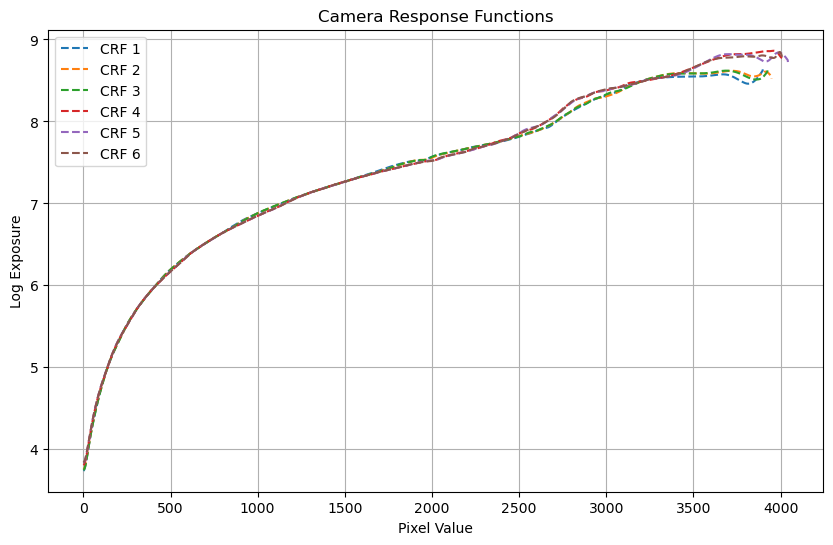

In [35]:
#Import CRF data from folder
data_directory = "C:\\Users\\apate\\OneDrive - Northeastern University\\Dennis Lab site\\Image processing\\IR VIVO data\\AP\\241217_checker_highgain\\8-exposure CRFs"
#load all .npy files in folder
crf_files = [f for f in os.listdir(data_directory) if f.endswith('.npy')]

#initialize crf_array
crf_array = np.zeros((4500, 6))
i = 0
for file in crf_files:
    crf_temp = np.load(os.path.join(data_directory, file))
    print(crf_temp.shape)
    crf_array[0:len(crf_temp),i] = crf_temp
    i=i+1
print(crf_array.shape)
#plot the CRFs
plt.figure(figsize=(10, 6))
#plot points except those with value of 0
for i in range(crf_array.shape[1]):

    plt.plot(np.arange(len(crf_array[crf_array[:, i] != 0, 0])),crf_array[crf_array[:, i] != 0, i], '--',label=f'CRF {i+1}')
    


plt.xlabel('Pixel Value')
plt.ylabel('Log Exposure')
plt.legend()
plt.grid(True)
plt.title('Camera Response Functions')
plt.show()

In [ ]:
#Obtain a weighting function from CRF using Mitsunaga/Nayar method
import Step2_image_radiance as image_rad

data_directory = "C:\\Users\\apate\\OneDrive - Northeastern University\\Dennis Lab site\\Image processing\\IR VIVO data\\AP\\241217_checker_highgain\\7-exposure CRFs"

#load CRF
crf = np.load(os.path.join(data_directory, ''))

#obtain weighting function by taking derivative of CRF
weighting_function = image_rad.mitsunaga_weight(crf)